In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch.nn.functional as F
sns.set()

In [3]:
def plot_mean_std(percentages, accuracies, label, log=False, color="blue"):
    mean = np.mean(accuracies,axis=0)
    std  = np.std(accuracies,axis=0)
   
    plt.plot(percentages,mean, label=label, color=color)
    plt.fill_between(percentages, mean + std, mean - std, facecolor=color, alpha=0.5)
    if log: plt.xscale('log')
    plt.legend()

In [4]:
def treat(arr):
    l = []
    k = []
    for i in range(arr.shape[0]):
        if arr[i]!=0:
            l.append(i)
    return l

In [5]:
random = np.load('new_random.npy')
random_b = np.load('random_sec.npy')

In [6]:
l = treat(random[0])
d = treat(random_b[0])


In [7]:
vogn= np.load('vogn_reg.npy')[:,l]

In [8]:
random = np.load('new_random.npy')[:,l]
random_b = np.load('random_sec.npy')[:,d]
random.shape,random_b.shape

((10, 262), (5, 262))

In [9]:
mc= np.load('mc_reg.npy')
mc_b= np.load('mc_reg_sec.npy')

In [10]:
k = treat(mc[0])
p = treat(mc_b[0])

In [11]:
mc= np.load('mc_reg.npy')[:,k]
mc_b= np.load('mc_reg_sec.npy')[:,p]
mc_c = np.load('mc_reg_sec_sec.npy')[:,p]

In [12]:
mc_var = np.load('mc_reg_var.npy')[:,p]
mc_red = np.load('mc_reg_red.npy')[:,p]
mc_red_v2 = np.load('mc_reg_red_v2.npy')[:,p]


In [13]:
r_n = np.load('random_n.npy')[:,l]

In [14]:
r_var_n = np.load('mc_var_n.npy')[:,l]

In [15]:
r_var_n.shape

(5, 262)

In [16]:
mc.shape,mc_b.shape,mc_c.shape,mc_var.shape,mc_red.shape

((5, 0), (5, 262), (5, 262), (5, 262), (5, 262))

should find random for next 'test'

In [17]:
mc_test= np.load('mc_reg_test.npy')[:,p]

In [18]:
batch_size_sample = np.ones(261).astype(int)
for i in range(100):
    
    batch_size_sample[i+110]=3
for i in range(60):
    batch_size_sample[i+200]=5

In [19]:
nnn = np.ones(262)
for i in range(261):
    nnn[i+1] = nnn[i] + batch_size_sample[i]

In [20]:
mc.shape,mc_b.shape

((5, 0), (5, 262))

plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0, 0.03), ylim=(1, 6), autoscale_on=False,title='Regression AL loss on OPAMP')
plot_mean_std(nnn[:101]/3420,random[:,:101],'random selection',color='orange')
#plot_mean_std(nnn[:101]/3420,vogn[:,:101],'Vogn selection',color='red')
plot_mean_std(nnn[:101]/3420,mc[:,:101],'MC selection',color='blue')

plt.savefig('graph_vogn_02.png')

In [21]:
ratio = mc_var/np.mean(random,axis=0)
ratio2 = mc_red/np.mean(random,axis=0)

<Figure size 432x288 with 0 Axes>

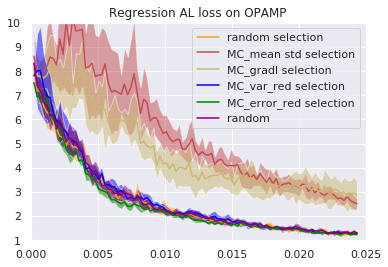

In [22]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0, 0.025), ylim=(1,10), autoscale_on=False,title='Regression AL loss on OPAMP')
plot_mean_std(nnn[:101]/4146,random[:,:101],'random selection',color='orange')
#plot_mean_std(nnn[:101]/4146,random_b[:,:101],'random selection',color='green')
#plot_mean_std(nnn[:101]/4146,mc_test[:,:101],'random selection',color='k')
#plot_mean_std(nnn[:101]/5620,vogn[:,:101],'Vogn selection',color='red')
#plot_mean_std(nnn[:101]/4146,mc[:,:101],'MC selection',color='blue')
plot_mean_std(nnn[:101]/4146,mc_b[:,:101],'MC_mean std selection',color='r')
plot_mean_std(nnn[:101]/4146,mc_c[:,:101],'MC_gradl selection',color='y')
plot_mean_std(nnn[:101]/4146,mc_var[:,:101],'MC_var_red selection',color='blue')
plot_mean_std(nnn[:101]/4146,mc_red[:,:101],'MC_error_red selection',color='green')
plot_mean_std(nnn[:101]/4146,r_n[:,:101],'random',color='purple')



plt.savefig('graph_3%_02.png')

<Figure size 432x288 with 0 Axes>

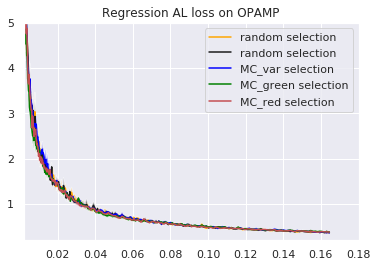

In [23]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0.002, 0.18), ylim=(0.2,5), autoscale_on=False,title='Regression AL loss on OPAMP')
plot_mean_std(nnn/4146,random,'random selection',color='orange')
#plot_mean_std(nnn/4146,random_b,'random selection',color='green')
plot_mean_std(nnn/4146,mc_test,'random selection',color='k')
#plot_mean_std(nnn[:101]/5620,vogn[:,:101],'Vogn selection',color='red')
#plot_mean_std(nnn/4146,mc,'MC selection',color='blue')
#plot_mean_std(nnn/4146,mc_b,'MC_b selection',color='r')
#plot_mean_std(nnn/4146,mc_c,'MC_b selection',color='y')
plot_mean_std(nnn/4146,mc_var,'MC_var selection',color='blue')
plot_mean_std(nnn/4146,mc_red,'MC_green selection',color='green')
plot_mean_std(nnn/4146,mc_red_v2,'MC_red selection',color='r')
#plot_mean_std(nnn/4146,r_var_n,'MC_red selection',color='purple')


plt.savefig('graph_3%_02.png')

<Figure size 432x288 with 0 Axes>

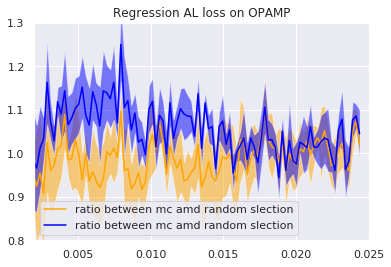

In [24]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0.002, 0.025), ylim=(0.8,1.3), autoscale_on=False,title='Regression AL loss on OPAMP')
plot_mean_std(nnn[:101]/4146,1/ratio[:,:101],'ratio between mc amd random slection',color='orange')
plot_mean_std(nnn[:101]/4146,1/ratio2[:,:101],'ratio between mc amd random slection',color='blue')


plt.savefig('graph_3%_ratio.png')

<Figure size 432x288 with 0 Axes>

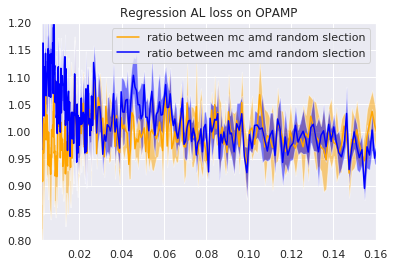

In [25]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0.002, 0.16), ylim=(0.8,1.2), autoscale_on=False,title='Regression AL loss on OPAMP')
plot_mean_std(nnn/4146,1/ratio,'ratio between mc amd random slection',color='orange')
plot_mean_std(nnn/4146,1/ratio2,'ratio between mc amd random slection',color='blue')

plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0, 0.018), ylim=(1, 6), autoscale_on=False,title='Regression AL loss on OPAMP')
plot_mean_std(nnn[:101]/5620,random[:,:101],'random selection',color='orange')
#plot_mean_std(nnn/3420,vogn,'Vogn_ selection',color='r')
plot_mean_std(nnn[:101]/5620,mc,'MC selection',color='blue')

plt.savefig('graph_vogn.png')

ValueError: x and y must have same first dimension, but have shapes (262,) and (0,)

<Figure size 432x288 with 0 Axes>

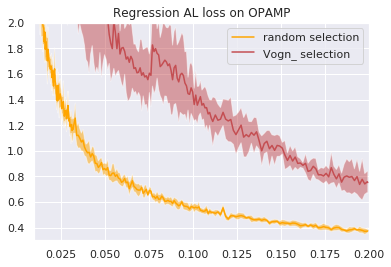

In [26]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0.01, 0.2), ylim=(0.3, 2), autoscale_on=False,title='Regression AL loss on OPAMP')
plot_mean_std(nnn/3420,random,'random selection',color='orange')
plot_mean_std(nnn/3420,vogn,'Vogn_ selection',color='r')
plot_mean_std(nnn/3420,mc,'MC selection',color='blue')

plt.savefig('graph_full.png')

In [ ]:
mse = np.load(...)
y    = np.load("regression/data/{}/testy.npy".format(dataset))
ybar = ytest.mean(axis=0, keepdims=True)
denominator = np.power((ytest - y.mean()),2).mean()
r2 = 1 - mse / denominator